In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [179]:
df = pd.read_csv("C:\\Users\\Darshan Gowda C\\Desktop\\jupyter\\0. Datasets\\income.csv")

In [180]:
df_new = df.copy()

In [181]:
df.shape

(31978, 13)

In [182]:
df_new.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [183]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [184]:
df_new.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [185]:
df_new.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [186]:
# summary of categorical variables
df_new.describe(include='object')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [187]:
df_new['JobType'].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [188]:
df_new['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [189]:
df_new['maritalstatus'].value_counts()

maritalstatus
 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: count, dtype: int64

In [190]:
df_new['race'].value_counts()

race
 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: count, dtype: int64

In [191]:
df_new['JobType'].unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [192]:
df_new['occupation'].unique()

array([' Adm-clerical', ' Armed-Forces', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Exec-managerial',
       ' Machine-op-inspct', ' ?', ' Transport-moving',
       ' Farming-fishing', ' Tech-support', ' Other-service',
       ' Handlers-cleaners', ' Protective-serv', ' Priv-house-serv'],
      dtype=object)

In [193]:
# we need to read the data set again bcz as we see the JobType and the occupation contains the null values in the form of '?'.
df = pd.read_csv("C:\\Users\\Darshan Gowda C\\Desktop\\jupyter\\0. Datasets\\income.csv",na_values=[' ?'])

In [194]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [195]:
missing = df[df.isnull().any(axis=1)] #axis=1 to consider atleast one column value is missing

In [196]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [197]:
missing['JobType'].unique()   # by this we come to know that, the JobType and occupation as null values for each other in each row and JobType contains extra one type ie.,'Never-worked'

array([nan, ' Never-worked'], dtype=object)

In [198]:
df1 = df.dropna(axis=0)

In [199]:
df1.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [200]:
df2=df.copy()
df3=df1.copy()

In [201]:
df1.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [202]:
#Gender proportion table
pd.crosstab(index=df1['gender'],columns='counts',normalize=True)

col_0,counts
gender,
Female,0.324315
Male,0.675685


In [203]:
# gender v/s salary status
pd.crosstab(index=df1['gender'],columns=df1['SalStat'],margins=True,normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


<Axes: xlabel='SalStat', ylabel='count'>

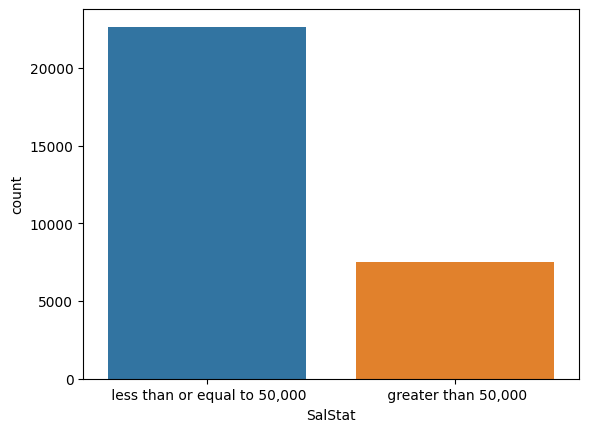

In [204]:
#frequency distribution of salary status
sns.countplot(x='SalStat',data=df1)

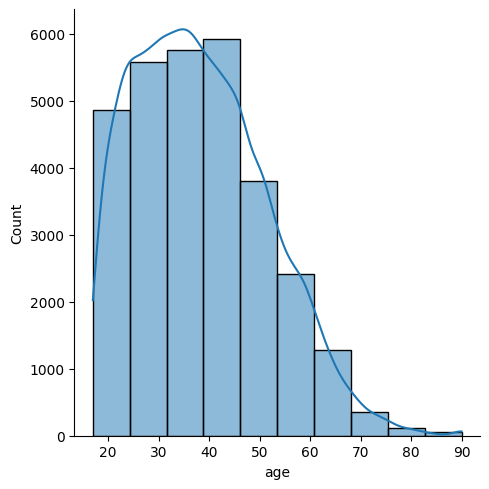

In [205]:
sns.displot(df1['age'],bins=10,kde=True)

<Axes: xlabel='SalStat', ylabel='age'>

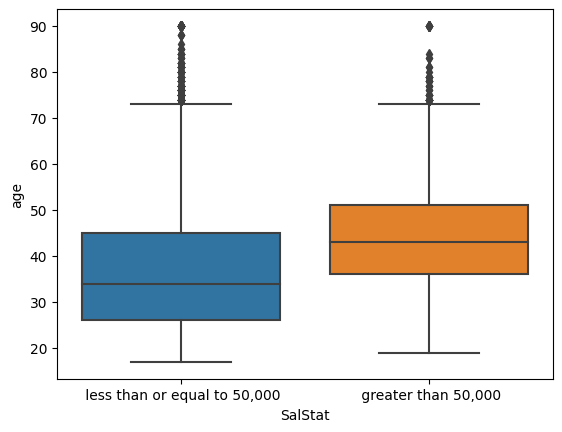

In [206]:
sns.boxplot(x='SalStat',y='age',data=df1)

In [207]:
df1.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


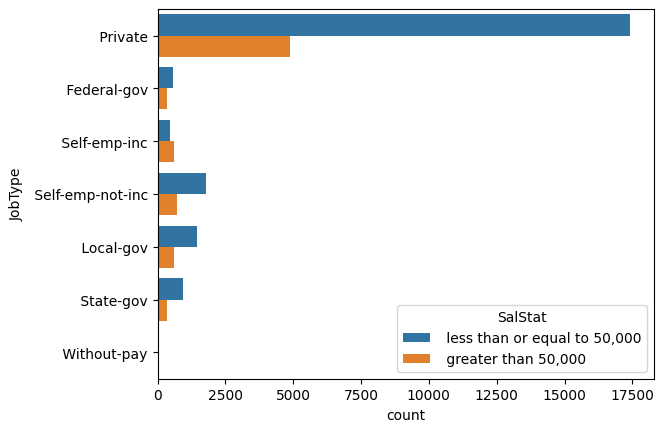

In [208]:
#**Job Type
JobType     = sns.countplot(y=df1['JobType'],hue = 'SalStat', data=df1)
job_salstat =pd.crosstab(index = df1["JobType"],columns = df1['SalStat'], margins = True, normalize = 'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


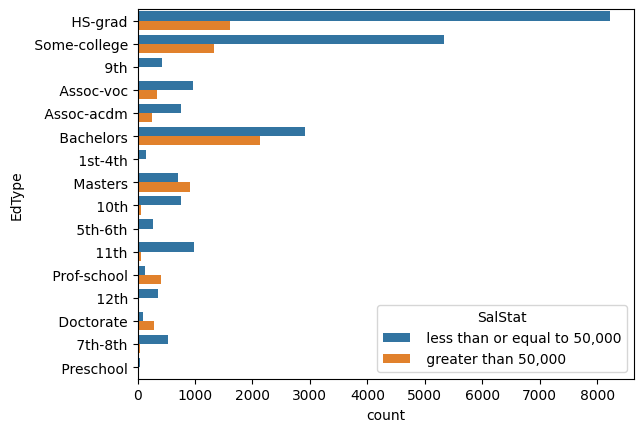

In [209]:
#education type

edu_type = sns.countplot(y='EdType',hue='SalStat',data=df1)
edu = pd.crosstab(index=df1['EdType'],columns=df1['SalStat'],margins=True,normalize='index')
round(edu*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


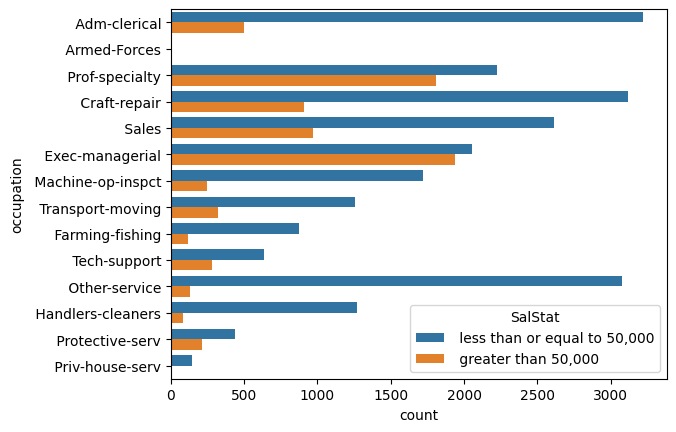

In [210]:
#occupation

occ_sal = sns.countplot(y=df1['occupation'],hue='SalStat',data=df1)
occ = pd.crosstab(index=df1['occupation'],columns=df1['SalStat'],margins=True,normalize='index')
round(occ*100,1)

C:\Users\Darshan Gowda C\AppData\Local\Temp\ipykernel_27992\2082974689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['capitalgain'],kde=False,bins=10)


<Axes: xlabel='capitalgain'>

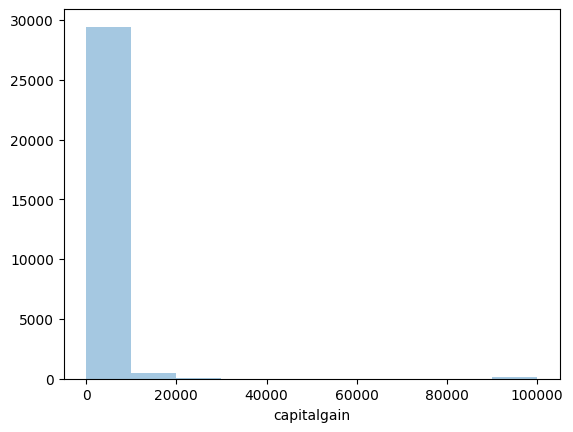

In [211]:
#capital gain
sns.distplot(df1['capitalgain'],kde=False,bins=10)

C:\Users\Darshan Gowda C\AppData\Local\Temp\ipykernel_27992\4229694065.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df1['capitalloss'],kde=False,bins=25,color='red')


<Axes: >

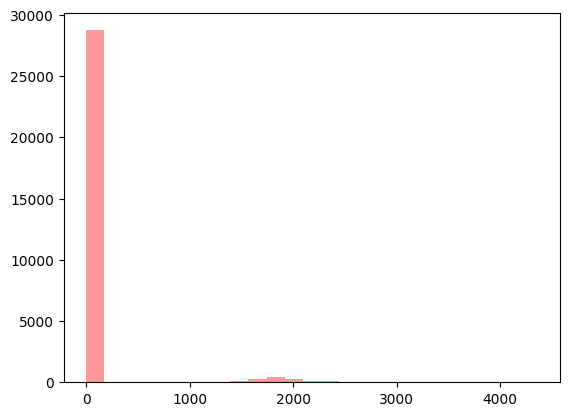

In [212]:
#capital loss
sns.distplot(x=df1['capitalloss'],kde=False,bins=25,color='red')

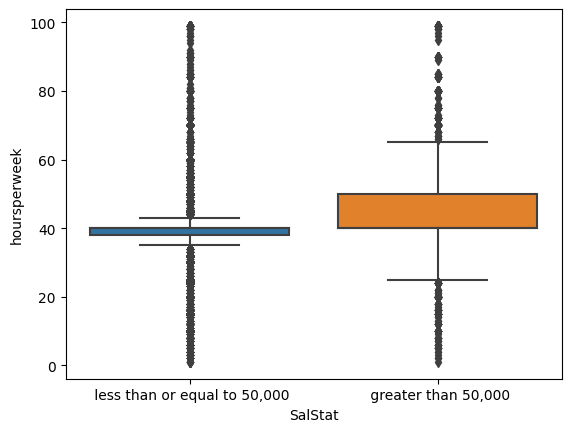

In [213]:
hours_sal = sns.boxplot(x='SalStat',y='hoursperweek',data=df1)


In [214]:
# Now building a machine learning model using the logistic regression

# Reindexing the salary status names to 0,1

df2['SalStat']=df2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(df2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [215]:
df2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [216]:
new_data = pd.get_dummies(df2,drop_first=True)

In [217]:
new_data


,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [218]:
new_data.shape

(31978, 96)

In [219]:
new_columns=list(new_data.columns)
new_columns

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Never-worked',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-hou

In [220]:
# Seperating the input names from data
feature = list(set(new_columns)-set(['SalStat']))
feature

['relationship_ Not-in-family',
 'maritalstatus_ Married-civ-spouse',
 'nativecountry_ Mexico',
 'nativecountry_ Haiti',
 'nativecountry_ Trinadad&Tobago',
 'nativecountry_ Columbia',
 'EdType_ 5th-6th',
 'EdType_ Some-college',
 'nativecountry_ United-States',
 'JobType_ Never-worked',
 'nativecountry_ Puerto-Rico',
 'nativecountry_ Cuba',
 'nativecountry_ Philippines',
 'occupation_ Prof-specialty',
 'occupation_ Exec-managerial',
 'nativecountry_ England',
 'JobType_ State-gov',
 'EdType_ 9th',
 'nativecountry_ Hungary',
 'JobType_ Private',
 'nativecountry_ Taiwan',
 'relationship_ Unmarried',
 'nativecountry_ Peru',
 'EdType_ 11th',
 'occupation_ Transport-moving',
 'JobType_ Local-gov',
 'occupation_ Farming-fishing',
 'occupation_ Armed-Forces',
 'relationship_ Other-relative',
 'maritalstatus_ Married-spouse-absent',
 'occupation_ Machine-op-inspct',
 'JobType_ Self-emp-not-inc',
 'occupation_ Priv-house-serv',
 'race_ Asian-Pac-Islander',
 'EdType_ 12th',
 'nativecountry_ Domi

In [221]:
# Storing the output values in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [222]:
# Storing the values from input features
x = new_data[feature].values
print(x)

[[True False False ... False False False]
 [False False False ... False False False]
 [False True False ... False False False]
 ...
 [False True False ... False False False]
 [False True False ... False False False]
 [True False False ... False False False]]


In [223]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.3,random_state=0)

In [224]:
#make an instance of model
logistic = LogisticRegression()

In [225]:
logistic.fit(train_x,train_y)

C:\Users\Darshan Gowda C\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
logistic.coef_

array([[-3.26496833e-01,  1.05127177e+00, -6.61477627e-01,
        -3.40215553e-02, -1.65678188e-02, -4.36329514e-02,
        -3.67615549e-01, -2.53837717e-01, -2.37022992e-02,
        -4.17919464e-03, -9.05552164e-02, -2.86266541e-02,
        -1.17800864e-01,  7.57030275e-01,  1.22767277e+00,
        -3.02789882e-02, -2.98868592e-01, -4.86824926e-01,
         3.52658251e-03, -1.36892576e-02, -3.95351195e-02,
        -1.12165640e+00, -2.79024667e-02, -6.64265558e-01,
        -2.70295146e-01, -4.93405298e-01, -5.90375630e-01,
        -1.19150270e-02, -4.80024247e-01, -2.01000938e-01,
        -6.36047298e-01, -7.81552617e-01, -7.18801247e-02,
        -5.98366627e-01, -2.85133873e-01, -5.49035297e-02,
        -2.06205148e-01,  7.33872320e-04, -1.52678498e+00,
        -4.68004786e-01, -4.94340610e-03, -3.92362630e-01,
        -1.97417246e-01, -1.13077305e-02, -1.28526547e-02,
         5.69750288e-01, -4.30852341e-02,  1.30967340e-02,
        -7.25065134e-02, -7.19582881e-02,  1.96537567e-0

In [227]:
logistic.intercept_

array([-2.14308549])

In [228]:
# Prediction from the test data

prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 1 1]


In [229]:
# Confusion matrix 

confusion_matrix = confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[15744  1232]
 [ 2218  3191]]


In [230]:
# calculating the accuracy

acc_score = accuracy_score(test_y,prediction)
print(acc_score)

0.8458789367880277


In [231]:
# Printing the misclassified values from predictions

print('missclassified values from predictions are %d' %(test_y != prediction).sum())

missclassified values from predictions are 3450


In [232]:
# so for increasing the accuracy score , we try it by removing some insignificant variables

# Reindexing the salary status names to 0,1

df3['SalStat']=df3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(df3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [234]:
df3.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [263]:
cols = ['gender','nativecountry','race','JobType']
new_data = df3.drop(cols,axis = 1)

In [264]:
new_data = pd.get_dummies(df3,drop_first=True)

In [265]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [266]:
column_list = list(new_data.columns)
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [267]:
feature2 = list(set(column_list)-set(['SalStat']))
feature2

['relationship_ Not-in-family',
 'maritalstatus_ Married-civ-spouse',
 'nativecountry_ Mexico',
 'nativecountry_ Haiti',
 'nativecountry_ Trinadad&Tobago',
 'nativecountry_ Columbia',
 'EdType_ 5th-6th',
 'EdType_ Some-college',
 'nativecountry_ United-States',
 'nativecountry_ Puerto-Rico',
 'nativecountry_ Cuba',
 'nativecountry_ Philippines',
 'occupation_ Prof-specialty',
 'occupation_ Exec-managerial',
 'nativecountry_ England',
 'JobType_ State-gov',
 'EdType_ 9th',
 'nativecountry_ Hungary',
 'JobType_ Private',
 'nativecountry_ Taiwan',
 'relationship_ Unmarried',
 'nativecountry_ Peru',
 'EdType_ 11th',
 'occupation_ Transport-moving',
 'JobType_ Local-gov',
 'occupation_ Farming-fishing',
 'occupation_ Armed-Forces',
 'relationship_ Other-relative',
 'maritalstatus_ Married-spouse-absent',
 'occupation_ Machine-op-inspct',
 'JobType_ Self-emp-not-inc',
 'occupation_ Priv-house-serv',
 'race_ Asian-Pac-Islander',
 'EdType_ 12th',
 'nativecountry_ Dominican-Republic',
 'marital

In [268]:
y2 = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [269]:
x2 = new_data[feature2].values
print(x2)

[[True False False ... False False False]
 [False False False ... False False False]
 [False True False ... False False False]
 ...
 [False True False ... False False False]
 [False True False ... False False False]
 [True False False ... False False False]]


In [270]:
train_x1,test_x1,train_y1,test_y1 = train_test_split(x2,y2,train_size=0.3,random_state=0)


In [271]:
logistic2 = LogisticRegression()

In [272]:
logistic2.fit(train_x1,train_y1)

C:\Users\Darshan Gowda C\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [273]:
prediction1 = logistic2.predict(test_x1)

In [274]:
print(prediction1)

[0 0 0 ... 0 0 1]


In [276]:
acc = accuracy_score(test_y1,prediction1)

In [277]:
acc

0.8394903855261912

In [278]:
print('misclassified samples are %d' %(test_y1 != prediction1).sum())

misclassified samples are 3389


By using logistic regression we got less accuracy[83-84] . So we now try to use the KNN algorithm to build the model to get high accuracy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_csv("C:\\Users\\Darshan Gowda C\\Desktop\\jupyter\\0. Datasets\\income.csv",na_values=['?'])

In [3]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [5]:
data.shape

(31978, 13)

In [6]:
missing = data[data.isnull().any(axis=1)]
# axis=1 => to consider at least one column value is missing in a row

In [7]:
data2 = data.dropna(axis=0)

In [9]:

# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [10]:
data2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [11]:
new_data = pd.get_dummies(data2,drop_first=True)

In [12]:
column_list = list(new_data.columns)
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Federal-gov',
 'JobType_ Local-gov',
 'JobType_ Never-worked',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct'

In [13]:
features=list(set(column_list)-set(['SalStat']))
features

['nativecountry_ Cuba',
 'JobType_ State-gov',
 'EdType_ Doctorate',
 'occupation_ Transport-moving',
 'nativecountry_ Haiti',
 'occupation_ Exec-managerial',
 'nativecountry_ Germany',
 'age',
 'maritalstatus_ Married-civ-spouse',
 'nativecountry_ Portugal',
 'nativecountry_ Hong',
 'EdType_ 11th',
 'EdType_ Some-college',
 'EdType_ 9th',
 'nativecountry_ El-Salvador',
 'occupation_ Sales',
 'nativecountry_ Columbia',
 'JobType_ Self-emp-not-inc',
 'EdType_ HS-grad',
 'occupation_ Priv-house-serv',
 'nativecountry_ Ireland',
 'nativecountry_ Jamaica',
 'nativecountry_ Puerto-Rico',
 'capitalgain',
 'occupation_ Other-service',
 'relationship_ Unmarried',
 'race_ Asian-Pac-Islander',
 'nativecountry_ Laos',
 'nativecountry_ Iran',
 'capitalloss',
 'race_ Other',
 'nativecountry_ Holand-Netherlands',
 'nativecountry_ Mexico',
 'nativecountry_ France',
 'nativecountry_ Thailand',
 'nativecountry_ Greece',
 'EdType_ 5th-6th',
 'nativecountry_ Nicaragua',
 'nativecountry_ Vietnam',
 'hours

In [15]:
y = new_data['SalStat'].values

In [16]:
x = new_data[features].values

In [17]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.3,random_state=0)

In [20]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [21]:
KNN.fit(train_x,train_y)

KNeighborsClassifier()

In [22]:
prediction = KNN.predict(test_x)

In [23]:
conf_mat = confusion_matrix(test_y,prediction)

In [25]:
print(conf_mat)

[[15411  1565]
 [ 2216  3193]]


In [26]:
acc_score = accuracy_score(test_y,prediction)
print(acc_score)

0.8310922492740674


In [27]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 3781


In [28]:
# Effect of k-value on classifier

missclassified_sample=[]
for i in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(train_x,train_y)
    pred_i = KNN.predict(test_x)
    missclassified_sample.append((test_y != pred_i).sum())

In [29]:
missclassified_sample

[4266,
 3796,
 3957,
 3673,
 3781,
 3664,
 3705,
 3692,
 3742,
 3653,
 3736,
 3670,
 3722,
 3696,
 3736,
 3711,
 3775,
 3751,
 3765]

In [32]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(train_x,train_y)
prediction1 = KNN.predict(test_x)
acc_score1 = accuracy_score(test_y,prediction1)
acc_score1

0.8368103640830914